In [1]:
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150.0

In [2]:
import numpy as np
import matplotlib.pyplot as pl

In [13]:
from peerless._search import search
from peerless.data import load_light_curves_for_kic, running_median_trend

In [251]:
kicid = 3558849
lcs = load_light_curves_for_kic(kicid)

In [252]:
time = np.concatenate([lc.time for lc in lcs])
flux = np.concatenate([lc.flux for lc in lcs])
ferr = np.concatenate([lc.ferr for lc in lcs])
chunk = np.concatenate([i + np.zeros(len(lc), dtype=int) for i, lc in enumerate(lcs)])

# Sort the times.
inds = np.argsort(time)
time = np.ascontiguousarray(time[inds])
flux = np.ascontiguousarray(flux[inds])
ferr = np.ascontiguousarray(ferr[inds])
chunk = np.ascontiguousarray(chunk[inds])

In [253]:
flux_ivar = 1.0/ferr**2
tau = 0.6
# time_grid = np.ascontiguousarray(time[::2])
time_grid = np.arange(time.min(), time.max(), 0.25 * tau)

In [254]:
depth, depth_ivar = search(tau, time_grid, time, flux - 1.0, flux_ivar)
s2n = depth * np.sqrt(depth_ivar)

m = depth_ivar > 0.0
noise = np.nan + np.zeros_like(s2n)
noise[m] = running_median_trend(time_grid[m], np.abs(s2n[m]), 10.0)

In [255]:
t0 = time_grid[np.argsort(s2n)[-1]] + 0.5*tau

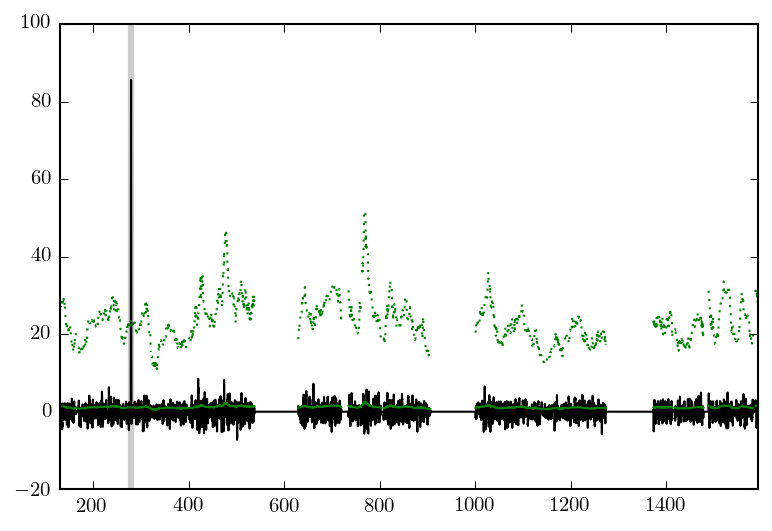

In [256]:
pl.plot(time_grid, s2n, "k")
pl.plot(time_grid, noise, "g")
pl.plot(time_grid, 20*noise, ":g")
pl.gca().axvline(t0, color="k", lw=3, alpha=0.2)
pl.xlim(time.min(), time.max());

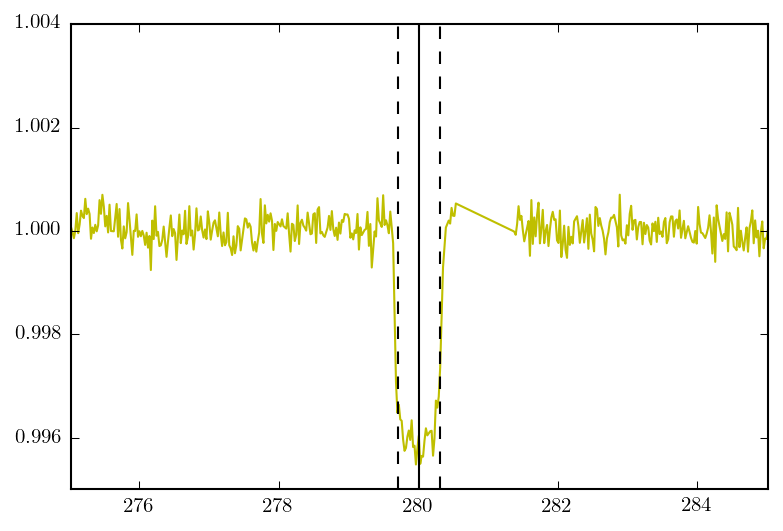

In [257]:
[pl.plot(lc.time, lc.flux, "-") for lc in lcs]
pl.gca().axvline(t0, color="k")
pl.gca().axvline(t0 - 0.5*tau, color="k", ls="dashed")
pl.gca().axvline(t0 + 0.5*tau, color="k", ls="dashed")
pl.xlim(t0 - 5, t0 + 5);

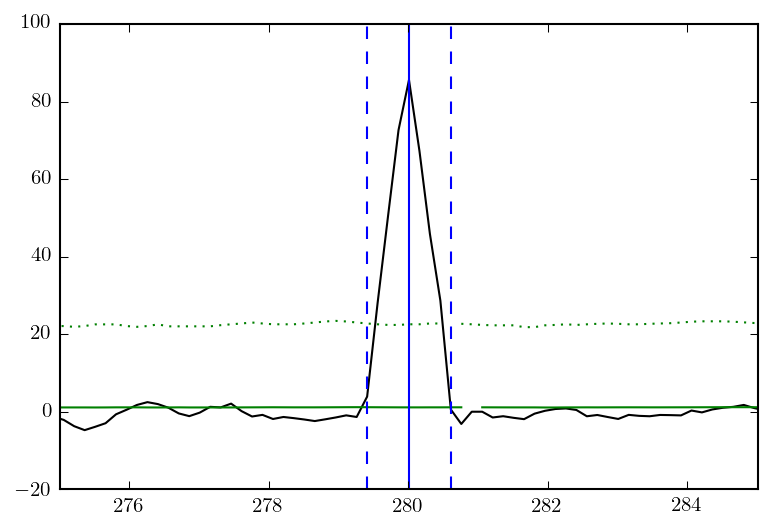

In [258]:
pl.plot(time_grid+0.5*tau, s2n, "k")
pl.plot(time_grid+0.5*tau, noise, "g")
pl.plot(time_grid, 20*noise, ":g")
pl.gca().axvline(t0)
pl.gca().axvline(t0 - tau, ls="dashed")
pl.gca().axvline(t0 + tau, ls="dashed")
pl.xlim(t0 - 5, t0 + 5);